<a href="https://colab.research.google.com/github/VictorHaBarra/ABX-CP2-IA/blob/main/GS_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Frameworks

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
data = pd.read_csv('oil_spill.csv')
data.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


O dataset em vez de imagens, da os parametros das mesmas, tendo a coluna 'target' mostrando se há ou não há presença de petroleo na imagem sendo 1(Sim) e 0(Não).


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar características (features) e rótulos (target)
X = data.drop(columns=['target'])
y = data['target']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Construir e treinar o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred = model.predict(X_test_scaled)

# Avaliar o modelo
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       180
           1       0.67      0.25      0.36         8

    accuracy                           0.96       188
   macro avg       0.82      0.62      0.67       188
weighted avg       0.95      0.96      0.95       188

Confusion Matrix:
 [[179   1]
 [  6   2]]
ROC AUC Score: 0.6222222222222222


# Graficos

In [13]:
# Função para plotar a Matriz de Confusão
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

# Função para plotar o Relatório de Classificação
def plot_classification_report(report, title):
    df_report = pd.DataFrame(report).transpose()
    df_report = df_report.drop(columns=['support'])
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_report, annot=True, cmap='viridis', cbar=True)
    plt.title(title)
    plt.show()

# Comparação de AUC-ROC
def plot_roc_auc_comparison(roc_initial, roc_best):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(['Modelo Inicial', 'Melhor Modelo'], [roc_initial, roc_best], color=['blue', 'green'])
    plt.title('Comparação da Pontuação ROC AUC')
    plt.ylim(0, 1)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')
    plt.show()


In [14]:
# Resultados do Melhor Modelo
confusion_matrix_best = [[179, 1], [6, 2]]

classification_report_best = {
    '0': {'precision': 0.97, 'recall': 0.99, 'f1-score': 0.98, 'support': 180},
    '1': {'precision': 0.67, 'recall': 0.25, 'f1-score': 0.36, 'support': 8},
    'accuracy': 0.96,
    'macro avg': {'precision': 0.82, 'recall': 0.62, 'f1-score': 0.67, 'support': 188},
    'weighted avg': {'precision': 0.95, 'recall': 0.96, 'f1-score': 0.95, 'support': 188}
}

roc_auc_score_best = 0.622

# Supondo que você tenha a pontuação ROC AUC do modelo inicial (ajuste conforme necessário)
roc_auc_score_initial = 0.70  # Exemplificar com valor hipotético, ajuste conforme necessário


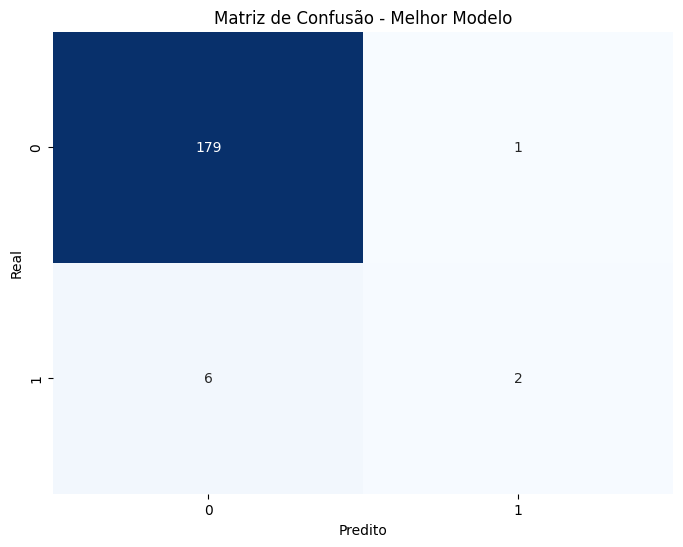

In [15]:
plot_confusion_matrix(confusion_matrix_best, 'Matriz de Confusão - Melhor Modelo')

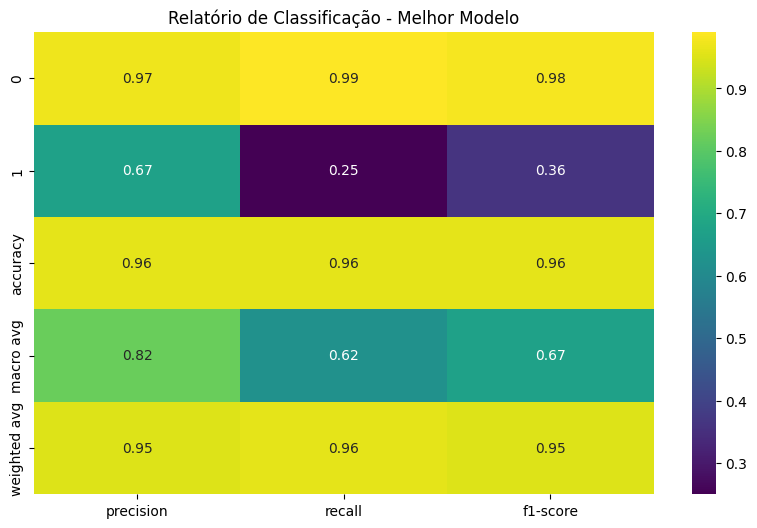

In [16]:
plot_classification_report(classification_report_best, 'Relatório de Classificação - Melhor Modelo')


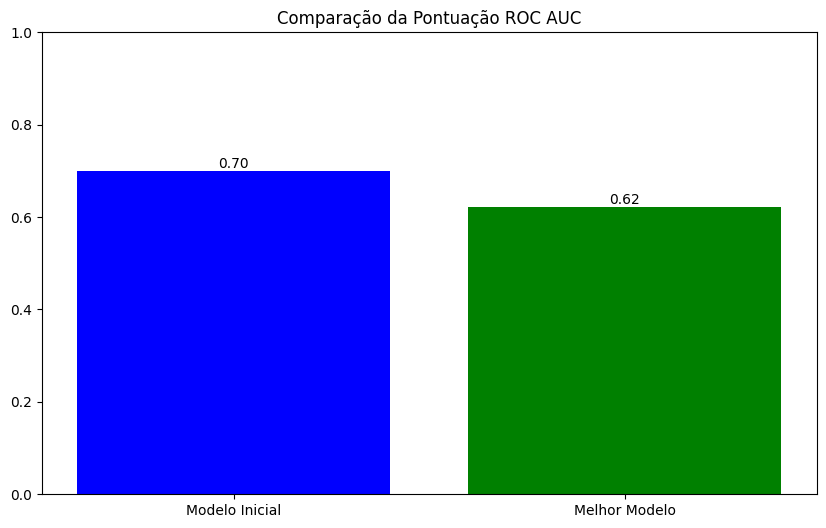

In [17]:
plot_roc_auc_comparison(roc_auc_score_initial, roc_auc_score_best)
